In [1]:
import os
import json

from wordcloud import WordCloud

import pandas as pd
from xploreapi import XPLORE

import matplotlib.pyplot as plt

In [2]:
def load_api_key(filepath):
    with open(filepath, 'r') as file:
        config = json.load(file)
        return config.get('XPLORE_API_KEY', None)

ieee_api_key = load_api_key('../api_keys.json')

if not ieee_api_key:
    print("XPlore API key not found in config.")

In [8]:
query = XPLORE(ieee_api_key)  # create an query object
query.maximumResults(200)  # define maximum number of results, 200 is the maximum
query.dataType('json')  # define data type
query.dataFormat('object')  # define data format
# query.issn('1949-3053')  # define ISSN
query.publicationTitle('IEEE Transactions on Smart Grid')
query.insertionStartDate('20230101')  # define start date
query.insertionEndDate('20230331')  # define end date
data = query.callAPI()  # call the API

In [9]:
articles_filter_no_author = [x for x in data['articles'] if len(x['authors']['authors']) > 0]
articles_filter_no_author_termns = [x for x in articles_filter_no_author if 'publication_date' in x.keys()]
articles = [x for x in articles_filter_no_author_termns if 'author_terms' in x['index_terms'].keys()]

df = pd.DataFrame()
df['doi'] = [x['doi'] for x in articles]
df['publication_date'] = [x['publication_date'] for x in articles]
df['ieee_terms'] = [x['index_terms']['ieee_terms']['terms'] for x in articles]
df['author_terms'] = [x['index_terms']['author_terms']['terms'] for x in articles]

In [10]:
df.shape

(120, 4)

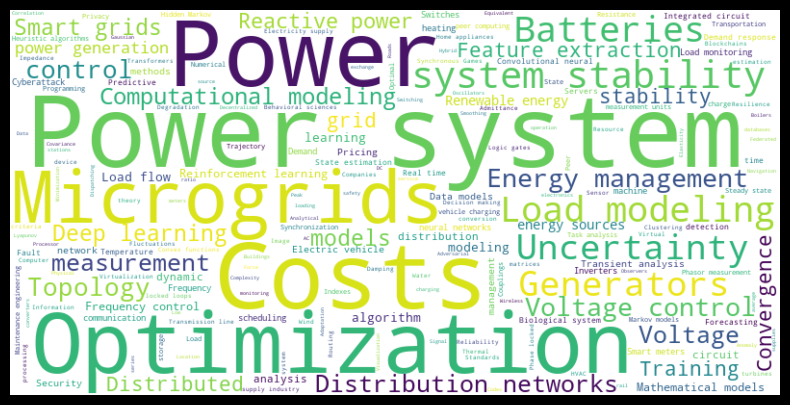

In [13]:
# Concatenate all words in ieee_terms column
all_terms = ' '.join(df['ieee_terms'].explode())

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_terms)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()